In [1]:
from matplotlib import pyplot as plt
import numpy as np
import qiskit
import qiskit_aer
import warnings

# Exercise 5 and 6: Time evolution operator $U(t)$, without and with noise

In [2]:
import qiskit.circuit


def time_evolve(circ:qiskit.circuit.QuantumCircuit,t:float,dt:float,w:float,w0:float,w1) -> qiskit.circuit.QuantumCircuit:
    """Applying the time evolution operator `U` to the circuit `circ`."""
    if not np.isclose(t/dt,int(t/dt)): warnings.warn("dt does not divide t!")

    N = int(t/dt)

    for iTrotter in range(N):
        theta_z = -w0 * dt
        theta_x = 2 * w1 * dt * np.cos(w * iTrotter * dt)
        circ.rx(theta_x,0)
        circ.rz(theta_z,0)
    
    return circ

In [3]:
# exact simulator
import qiskit.providers
import qiskit.providers.fake_provider


sim = qiskit_aer.AerSimulator()

# noisy simulator
p = 0.1
gamma = 0.02
GAD = qiskit_aer.noise.amplitude_damping_error(gamma,p)
noise = qiskit_aer.noise.NoiseModel()
noise.add_all_qubit_quantum_error(error=GAD,instructions=["rx","rz"])
sim_noise = qiskit_aer.AerSimulator(noise_model=noise)

# fake provider
sim_fake = qiskit.providers.fake_provider.Fake5QV1()

### Doing the experiment using 400 shots

In [4]:
w0 = 25
w1 = 2
dt = 0.05
nShots = 400

In [5]:
# (a) for different t
w = 25.5
tAxis = np.linspace(start=1,stop=4,num=300)
populations_a = np.zeros(shape=(tAxis.shape[0],3))

for i,t in enumerate(tAxis):
    circ = qiskit.QuantumCircuit(1,1)
    # adding the time evolution
    circ = time_evolve(circ,t,dt,w,w0,w1)
    # adding the measurement
    circ.measure(qubit=0,cbit=0)

    # running the noiseless circuit 400 times
    populations_a[i,0] = sim.run(circ,shots=nShots).result().get_counts(circ).get("1")
    # running the noisy circuit 400 times
    populations_a[i,1] = sim_noise.run(circ,shots=nShots).result().get_counts(circ).get("1")
    # running the circuit on the fake backend 400 times
    populations_a[i,2] = sim_fake.run(run_input=circ,shots=nShots).result().get_counts(circ).get("1")

/var/folders/xd/w75n_hkn7yxdt_5lc6n52n0m0000gn/T/ipykernel_74521/1609184630.py:6: UserWarning: dt does not divide t!
  if not np.isclose(t/dt,int(t/dt)): warnings.warn("dt does not divide t!")


In [6]:
# (6,7) changing dt
dt = 0.01
populations_6_7 = np.zeros(shape=(tAxis.shape[0],2))

for i,t in enumerate(tAxis):
    circ = qiskit.QuantumCircuit(1,1)
    # adding the time evolution
    circ = time_evolve(circ,t,dt,w,w0,w1)
    # adding the measurement
    circ.measure(qubit=0,cbit=0)

    # running the noisy circuit 400 times
    populations_6_7[i,0] = sim_noise.run(circ,shots=nShots).result().get_counts(circ).get("1")
    # running the circuit on the fake backend 400 times
    populations_6_7[i,1] = sim_fake.run(run_input=circ,shots=nShots).result().get_counts(circ).get("1")

/var/folders/xd/w75n_hkn7yxdt_5lc6n52n0m0000gn/T/ipykernel_74521/1609184630.py:6: UserWarning: dt does not divide t!
  if not np.isclose(t/dt,int(t/dt)): warnings.warn("dt does not divide t!")


In [7]:
# (b) for different detunings delta = w - w0
t = np.pi / w1
deltaAxis = np.linspace(start=10,stop=40,num=300)
populations_b = np.zeros(shape=deltaAxis.shape)
for i,delta in enumerate(deltaAxis):
    circ = qiskit.QuantumCircuit(1,1)
    # adding the time evolution
    w = delta + w0
    circ = time_evolve(circ,t,dt,w,w0,w1)
    # adding the measurement
    circ.measure(qubit=0,cbit=0)

    # running the circuit 400 times
    populations_b[i] = sim.run(circ,shots=nShots).result().get_counts(circ).get("1")

/var/folders/xd/w75n_hkn7yxdt_5lc6n52n0m0000gn/T/ipykernel_74521/1609184630.py:6: UserWarning: dt does not divide t!
  if not np.isclose(t/dt,int(t/dt)): warnings.warn("dt does not divide t!")


In [8]:
# (c) w = w0 = w1 = 2
w = 2
w0 = 2
w1 = 2
circ = qiskit.QuantumCircuit(1,1)
# adding the time evolution
circ = time_evolve(circ,t,dt,w,w0,w1)
# adding the measurement
circ.measure(qubit=0,cbit=0)

# running the circuit 400 times
population_c = sim.run(circ,shots=nShots).result().get_counts(circ).get("1")

print(f"Population: {population_c}")

Population: 370


/var/folders/xd/w75n_hkn7yxdt_5lc6n52n0m0000gn/T/ipykernel_74521/1609184630.py:6: UserWarning: dt does not divide t!
  if not np.isclose(t/dt,int(t/dt)): warnings.warn("dt does not divide t!")


Plotting the results for different time spans $t$, simulated using the exact backend, the noisy backend and the fake backend

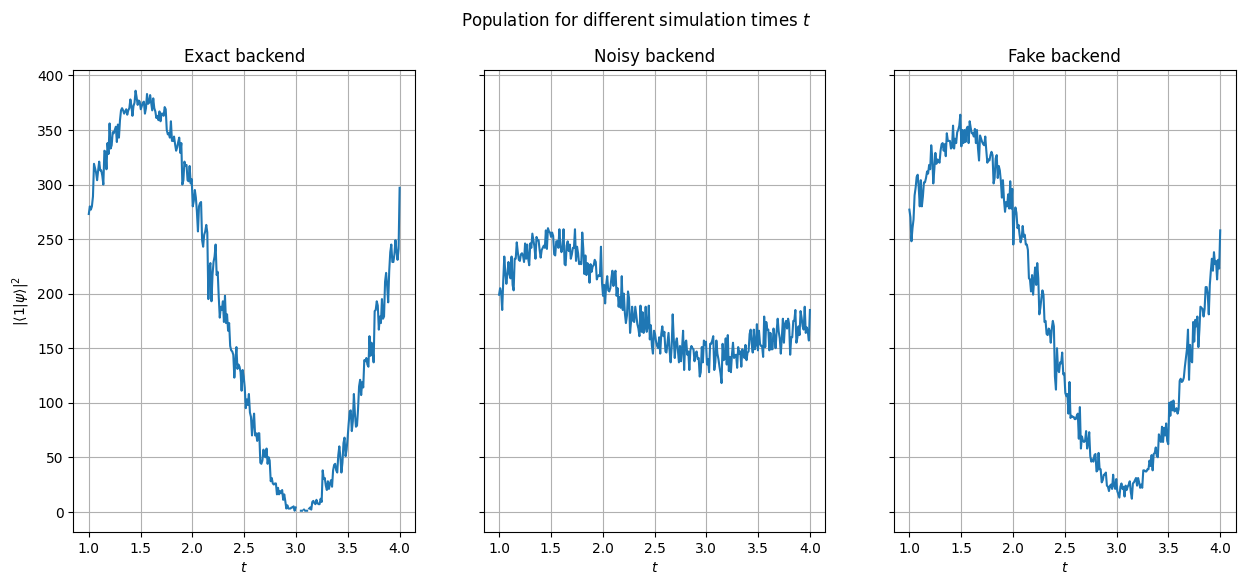

In [9]:
fig_a,ax_a = plt.subplots(nrows=1,ncols=3,figsize=(15,6),sharey=True)
fig_a.suptitle("Population for different simulation times $t$")
ax_a[0].plot(tAxis,populations_a[:,0])
ax_a[0].set_xlabel("$t$")
ax_a[0].set_ylabel(r"$|\langle 1|\psi\rangle|^2$")
ax_a[0].set_title("Exact backend")
ax_a[0].grid()

ax_a[1].plot(tAxis,populations_a[:,1])
ax_a[1].set_xlabel("$t$")
ax_a[1].set_title("Noisy backend")
ax_a[1].grid()

ax_a[2].plot(tAxis,populations_a[:,2])
ax_a[2].set_xlabel("$t$")
ax_a[2].set_title("Fake backend")
ax_a[2].grid()

# Plotting the simulation results of noisy backend and fake backend for smaller $\delta t$

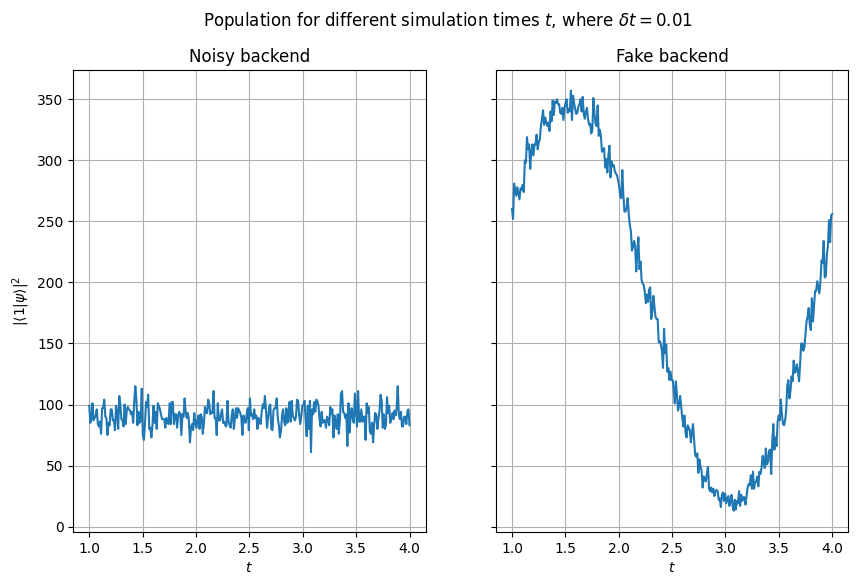

In [10]:
fig_67,ax_67 = plt.subplots(nrows=1,ncols=2,figsize=(10,6),sharey=True)
fig_67.suptitle("Population for different simulation times $t$, where $\delta t=0.01$")
ax_67[0].plot(tAxis,populations_6_7[:,0])
ax_67[0].set_xlabel("$t$")
ax_67[0].set_ylabel(r"$|\langle 1|\psi\rangle|^2$")
ax_67[0].set_title("Noisy backend")
ax_67[0].grid()

ax_67[1].plot(tAxis,populations_6_7[:,1])
ax_67[1].set_xlabel("$t$")
ax_67[1].set_title("Fake backend")
ax_67[1].grid()

Text(0, 0.5, '$|\\langle 1|\\psi\\rangle|^2$')

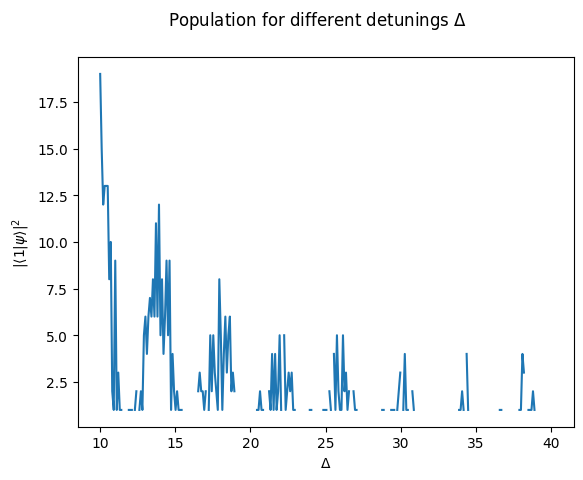

In [11]:
fig_b,ax_b = plt.subplots(nrows=1,ncols=1)
fig_b.suptitle("Population for different detunings $\Delta$")
ax_b.plot(deltaAxis,populations_b)
ax_b.set_xlabel("$\Delta$")
ax_b.set_ylabel(r"$|\langle 1|\psi\rangle|^2$")